# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the navigation task. This task has been taken from Udacity-Deep-Reinforcement-Learning Nanodegree. The algorithm you will be implementing is **REINFORCE** to achieve the task.

(https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/vaibhav/Downloads/Assignment2/Banana_Linux/Banana.x86_64", no_graphics = True) #put path to environment file

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
from collections import deque

brain_name  = env.brain_names[0]
brain       = env.brains[brain_name]
env_info    = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state       = env_info.vector_observations[0]
state_size  = len(state)

SvsEpi    = []                     # scores vs episodes
meanScore = []
scores_window = deque(maxlen=50)   # last 50 scores

running_reward  = 0
EPISODES        = 2000

A = Agent(state_size, action_size, seed=4)
    
for i_episode in range(1, EPISODES+1):
    env_info     = env.reset(train_mode=True)[brain_name]       # reset the environment
    state        = env_info.vector_observations[0]              # get the current state
    currscore    = 0
    for t in range(1, 2000):                           # Avoiding infinite trajectory
        action     = A.act(state)                      # get the action from agent
        env_info   = env.step(action)[brain_name]      # send the action to the environment
        next_state = env_info.vector_observations[0]   # get S'
        reward     = env_info.rewards[0]               # get R
        done       = env_info.local_done[0]            # get done
        A.step(state, action, reward, next_state, done)
        state  = next_state 
        currscore += reward
        if done:
            break
    scores_window.append(currscore)       # save most recent score
    SvsEpi.append(currscore)              # save all_score
    avg_score = np.mean(scores_window)
    meanScore.append(avg_score)
    
    print('Episode {} Average Score: {:.2f} Current Score: {:.2f}'.format(i_episode, avg_score, currscore)) 
    if np.mean(scores_window)>=13.0:
        print("Done!")
        break

Episode 1 Average Score: 3.00 Current Score: 3.00
Episode 2 Average Score: 2.00 Current Score: 1.00
Episode 3 Average Score: 1.33 Current Score: 0.00
Episode 4 Average Score: 1.50 Current Score: 2.00
Episode 5 Average Score: 1.00 Current Score: -1.00
Episode 6 Average Score: 0.00 Current Score: -5.00
Episode 7 Average Score: -0.14 Current Score: -1.00
Episode 8 Average Score: -0.25 Current Score: -1.00
Episode 9 Average Score: -0.33 Current Score: -1.00
Episode 10 Average Score: -0.30 Current Score: 0.00
Episode 11 Average Score: -0.27 Current Score: 0.00
Episode 12 Average Score: -0.17 Current Score: 1.00
Episode 13 Average Score: -0.15 Current Score: 0.00
Episode 14 Average Score: 0.00 Current Score: 2.00
Episode 15 Average Score: 0.07 Current Score: 1.00
Episode 16 Average Score: -0.06 Current Score: -2.00
Episode 17 Average Score: -0.06 Current Score: 0.00
Episode 18 Average Score: 0.06 Current Score: 2.00
Episode 19 Average Score: 0.05 Current Score: 0.00
Episode 20 Average Score:

Episode 160 Average Score: 2.30 Current Score: 8.00
Episode 161 Average Score: 2.46 Current Score: 10.00
Episode 162 Average Score: 2.54 Current Score: 6.00
Episode 163 Average Score: 2.56 Current Score: 5.00
Episode 164 Average Score: 2.56 Current Score: 3.00
Episode 165 Average Score: 2.56 Current Score: 5.00
Episode 166 Average Score: 2.48 Current Score: 1.00
Episode 167 Average Score: 2.50 Current Score: 2.00
Episode 168 Average Score: 2.42 Current Score: -1.00
Episode 169 Average Score: 2.42 Current Score: -1.00
Episode 170 Average Score: 2.52 Current Score: 2.00
Episode 171 Average Score: 2.64 Current Score: 9.00
Episode 172 Average Score: 2.56 Current Score: 1.00
Episode 173 Average Score: 2.46 Current Score: -4.00
Episode 174 Average Score: 2.56 Current Score: 4.00
Episode 175 Average Score: 2.60 Current Score: 2.00
Episode 176 Average Score: 2.74 Current Score: 6.00
Episode 177 Average Score: 2.82 Current Score: 4.00
Episode 178 Average Score: 2.78 Current Score: 0.00
Episode 

Episode 316 Average Score: 9.78 Current Score: 10.00
Episode 317 Average Score: 9.74 Current Score: 10.00
Episode 318 Average Score: 9.58 Current Score: 4.00
Episode 319 Average Score: 9.48 Current Score: 6.00
Episode 320 Average Score: 9.38 Current Score: 7.00
Episode 321 Average Score: 9.44 Current Score: 14.00
Episode 322 Average Score: 9.52 Current Score: 15.00
Episode 323 Average Score: 9.42 Current Score: 7.00
Episode 324 Average Score: 9.40 Current Score: 10.00
Episode 325 Average Score: 9.46 Current Score: 10.00
Episode 326 Average Score: 9.58 Current Score: 15.00
Episode 327 Average Score: 9.70 Current Score: 11.00
Episode 328 Average Score: 9.82 Current Score: 14.00
Episode 329 Average Score: 9.84 Current Score: 8.00
Episode 330 Average Score: 10.00 Current Score: 12.00
Episode 331 Average Score: 10.08 Current Score: 8.00
Episode 332 Average Score: 10.24 Current Score: 12.00
Episode 333 Average Score: 10.26 Current Score: 8.00
Episode 334 Average Score: 10.40 Current Score: 1

Episode 470 Average Score: 9.50 Current Score: 1.00
Episode 471 Average Score: 9.38 Current Score: 8.00
Episode 472 Average Score: 9.44 Current Score: 12.00
Episode 473 Average Score: 9.36 Current Score: 10.00
Episode 474 Average Score: 9.26 Current Score: 5.00
Episode 475 Average Score: 9.10 Current Score: 0.00
Episode 476 Average Score: 8.96 Current Score: 3.00
Episode 477 Average Score: 8.96 Current Score: 11.00
Episode 478 Average Score: 8.88 Current Score: 7.00
Episode 479 Average Score: 9.02 Current Score: 15.00
Episode 480 Average Score: 8.72 Current Score: 2.00
Episode 481 Average Score: 8.80 Current Score: 11.00
Episode 482 Average Score: 8.82 Current Score: 9.00
Episode 483 Average Score: 8.66 Current Score: 3.00
Episode 484 Average Score: 8.72 Current Score: 13.00
Episode 485 Average Score: 8.60 Current Score: 0.00
Episode 486 Average Score: 8.54 Current Score: 8.00
Episode 487 Average Score: 8.62 Current Score: 15.00
Episode 488 Average Score: 8.68 Current Score: 9.00
Episo

Episode 625 Average Score: 10.56 Current Score: 13.00
Episode 626 Average Score: 10.58 Current Score: 17.00
Episode 627 Average Score: 10.58 Current Score: 10.00
Episode 628 Average Score: 10.52 Current Score: 12.00
Episode 629 Average Score: 10.52 Current Score: 10.00
Episode 630 Average Score: 10.34 Current Score: 6.00
Episode 631 Average Score: 10.42 Current Score: 17.00
Episode 632 Average Score: 10.58 Current Score: 14.00
Episode 633 Average Score: 10.72 Current Score: 13.00
Episode 634 Average Score: 10.90 Current Score: 10.00
Episode 635 Average Score: 10.80 Current Score: 11.00
Episode 636 Average Score: 10.80 Current Score: 16.00
Episode 637 Average Score: 10.72 Current Score: 9.00
Episode 638 Average Score: 10.46 Current Score: 3.00
Episode 639 Average Score: 10.64 Current Score: 9.00
Episode 640 Average Score: 10.54 Current Score: 9.00
Episode 641 Average Score: 10.50 Current Score: 15.00
Episode 642 Average Score: 10.58 Current Score: 17.00
Episode 643 Average Score: 10.60 

Episode 780 Average Score: 11.18 Current Score: 14.00
Episode 781 Average Score: 11.46 Current Score: 17.00
Episode 782 Average Score: 11.68 Current Score: 12.00
Episode 783 Average Score: 11.80 Current Score: 10.00
Episode 784 Average Score: 12.02 Current Score: 15.00
Episode 785 Average Score: 12.30 Current Score: 16.00
Episode 786 Average Score: 12.34 Current Score: 9.00
Episode 787 Average Score: 12.52 Current Score: 15.00
Episode 788 Average Score: 12.52 Current Score: 11.00
Episode 789 Average Score: 12.54 Current Score: 12.00
Episode 790 Average Score: 12.44 Current Score: 8.00
Episode 791 Average Score: 12.50 Current Score: 12.00
Episode 792 Average Score: 12.56 Current Score: 14.00
Episode 793 Average Score: 12.54 Current Score: 12.00
Episode 794 Average Score: 12.58 Current Score: 14.00
Episode 795 Average Score: 12.64 Current Score: 14.00
Episode 796 Average Score: 12.68 Current Score: 14.00
Episode 797 Average Score: 12.72 Current Score: 12.00
Episode 798 Average Score: 12.

Episode 933 Average Score: 11.28 Current Score: 15.00
Episode 934 Average Score: 11.28 Current Score: 10.00
Episode 935 Average Score: 11.40 Current Score: 14.00
Episode 936 Average Score: 11.46 Current Score: 11.00
Episode 937 Average Score: 11.50 Current Score: 7.00
Episode 938 Average Score: 11.74 Current Score: 18.00
Episode 939 Average Score: 11.82 Current Score: 12.00
Episode 940 Average Score: 11.90 Current Score: 15.00
Episode 941 Average Score: 11.92 Current Score: 11.00
Episode 942 Average Score: 11.94 Current Score: 12.00
Episode 943 Average Score: 11.90 Current Score: 10.00
Episode 944 Average Score: 12.04 Current Score: 16.00
Episode 945 Average Score: 12.06 Current Score: 16.00
Episode 946 Average Score: 12.14 Current Score: 12.00
Episode 947 Average Score: 12.14 Current Score: 13.00
Episode 948 Average Score: 12.12 Current Score: 14.00
Episode 949 Average Score: 11.92 Current Score: 0.00
Episode 950 Average Score: 11.92 Current Score: 9.00
Episode 951 Average Score: 11.9

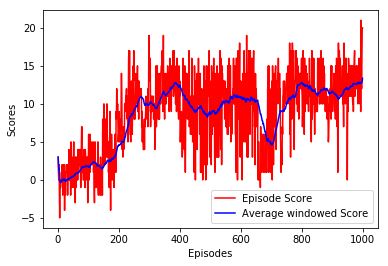

In [8]:
import matplotlib.pyplot as plt
plt.xlabel("Episodes")
plt.ylabel("Scores")
plt.plot([i for i in range(1, len(SvsEpi)+1)], SvsEpi, '-r', label = "Episode Score",)
plt.plot([i for i in range(1, len(meanScore)+1)], meanScore, '-b', label = "Average windowed Score",)
plt.legend()
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```